# Visualize multiple entangled qbits on one bloch diagram

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


## Define Functions

In [2]:
class QVis():
    def __init__(self, qbit_rotations):
        self.coordinates = []
        for qbit in qbit_rotations:
            self.coordinates.append(self.sph2cart(qbit[0],qbit[1], 1))
        pass

    @staticmethod
    def sph2cart(az, el, r):
        rcos_theta = r * np.cos(el)
        x = rcos_theta * np.cos(az)
        y = rcos_theta * np.sin(az)
        z = r * np.sin(el)
        return x, y, z

    @staticmethod
    def cart2sph(x, y, z):
        hxy = np.hypot(x, y)
        r = np.hypot(hxy, z)
        el = np.arctan2(z, hxy)
        az = np.arctan2(y, x)
        return az, el, r

    @staticmethod
    def create_sphere():
        u = np.linspace(0, np.pi, 15)
        v = np.linspace(0, 2 * np.pi, 15)

        x = np.outer(np.sin(u), np.sin(v))
        y = np.outer(np.sin(u), np.cos(v))
        z = np.outer(np.cos(u), np.ones_like(v))
        return x,y,z

    def draw(self, ax):
        # draw quantum rotation arrows
        last_c = [0,0,0]
        for c in self.coordinates:
            ax.quiver(last_c[0],last_c[1],last_c[2],c[0],c[1],c[2], color='red')
            last_c[0] = last_c[0] + c[0]
            last_c[1] = last_c[1] + c[1]
            last_c[2] = last_c[2] + c[2]

        # draw quantum end point arrow on sphere
        sph = self.cart2sph(last_c[0],last_c[1],last_c[2])
        cart = self.sph2cart(sph[0],sph[1],1)
        ax.quiver(0,0,0,cart[0],cart[1],cart[2], color='green')
        ax.scatter(cart[0],cart[1],cart[2], color= 'black',s=500)
        return 0

## 1 entangled qbit

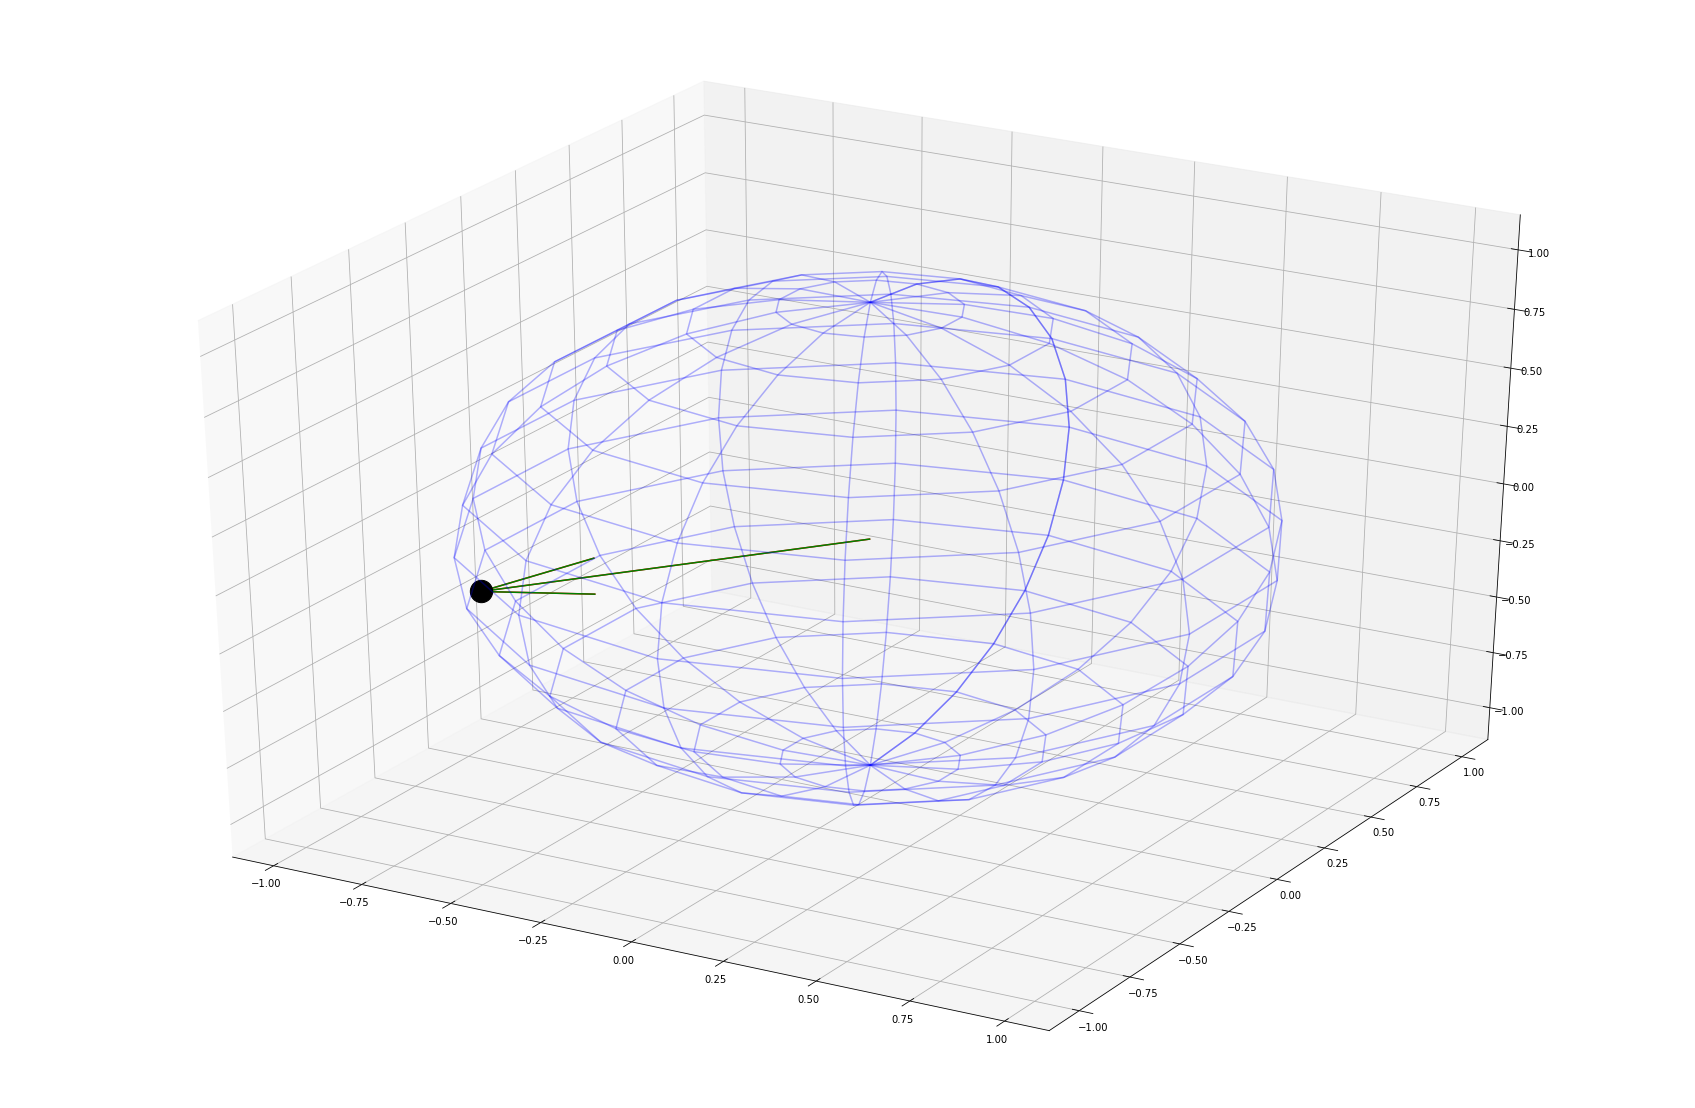

In [3]:
qbit_rotations = [[180,0]] 

fig = plt.figure(figsize=(30,20))
ax = plt.axes(projection='3d')

qvis = QVis(qbit_rotations)
qvis.draw(ax)

x,y,z = qvis.create_sphere()
ax.plot_wireframe(x, y, z, alpha = 0.3, color='blue')

## 2 entangled qbit

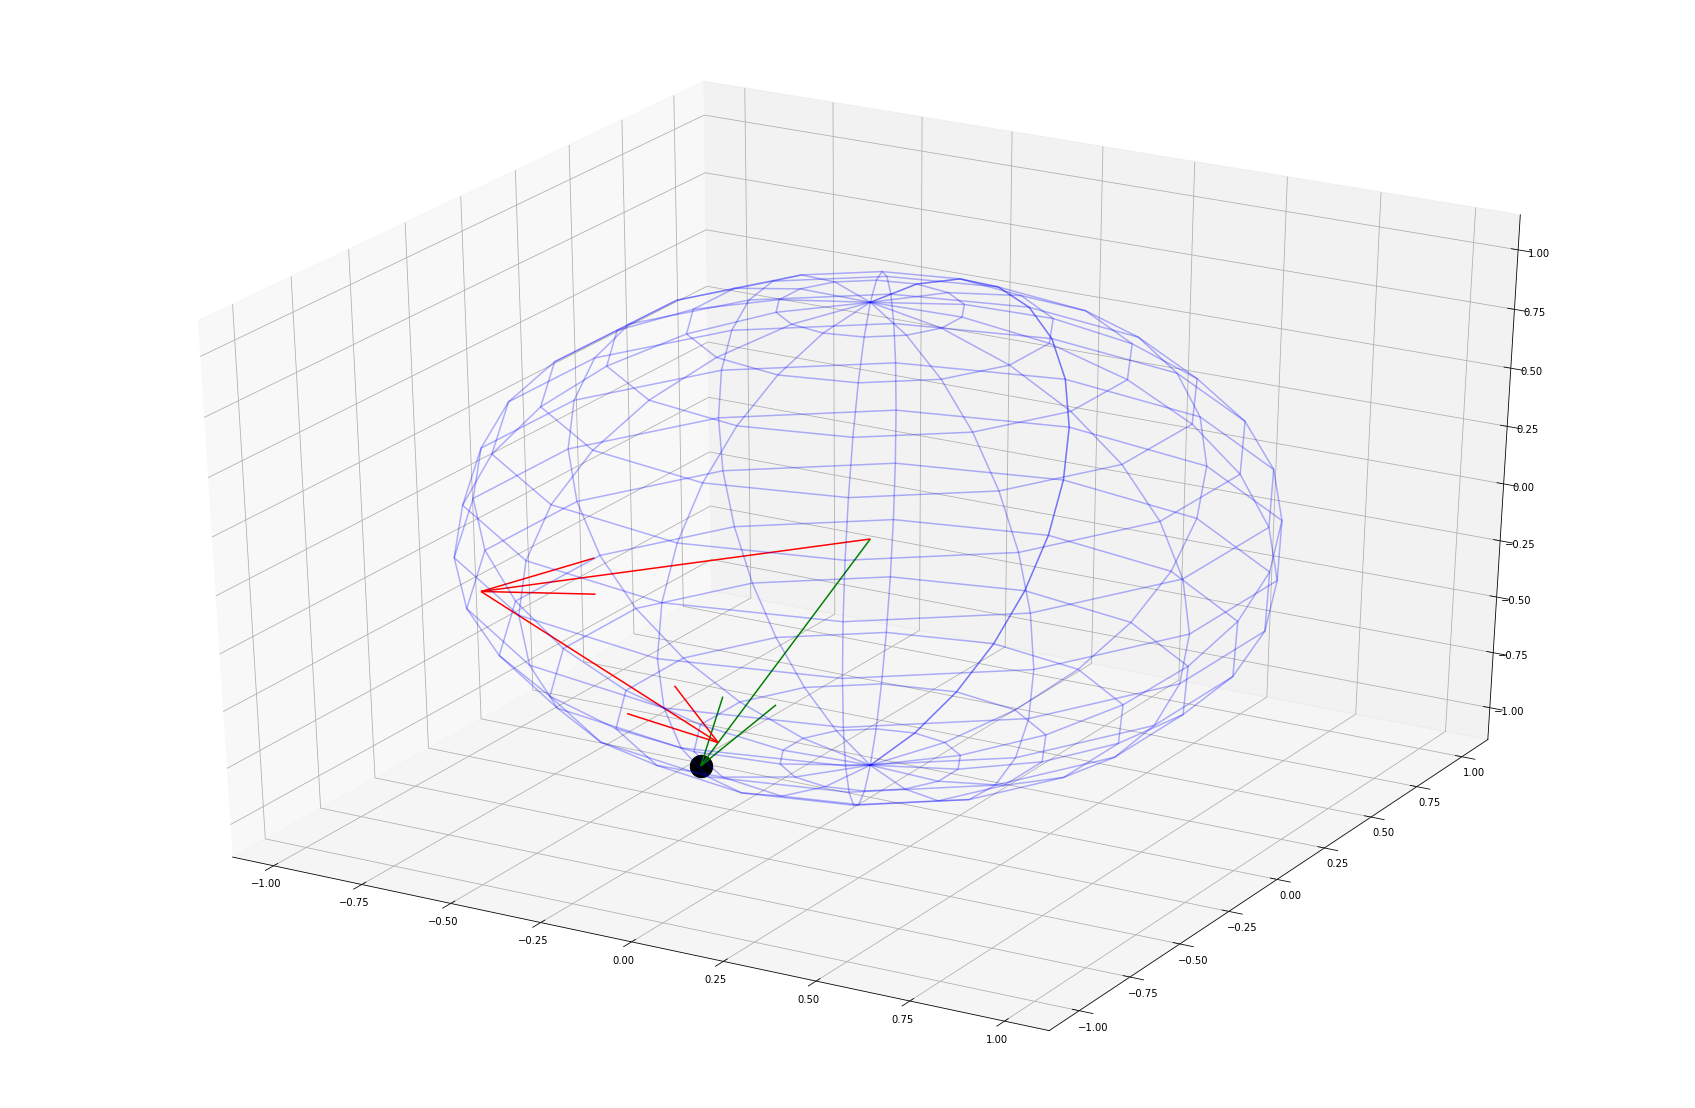

In [4]:
qbit_rotations = [[180,0],[180,180]] 

fig = plt.figure(figsize=(30,20))
ax = plt.axes(projection='3d')

qvis = QVis(qbit_rotations)
qvis.draw(ax)

x,y,z = qvis.create_sphere()
ax.plot_wireframe(x, y, z, alpha = 0.3, color='blue')

## 3 entangled qbit

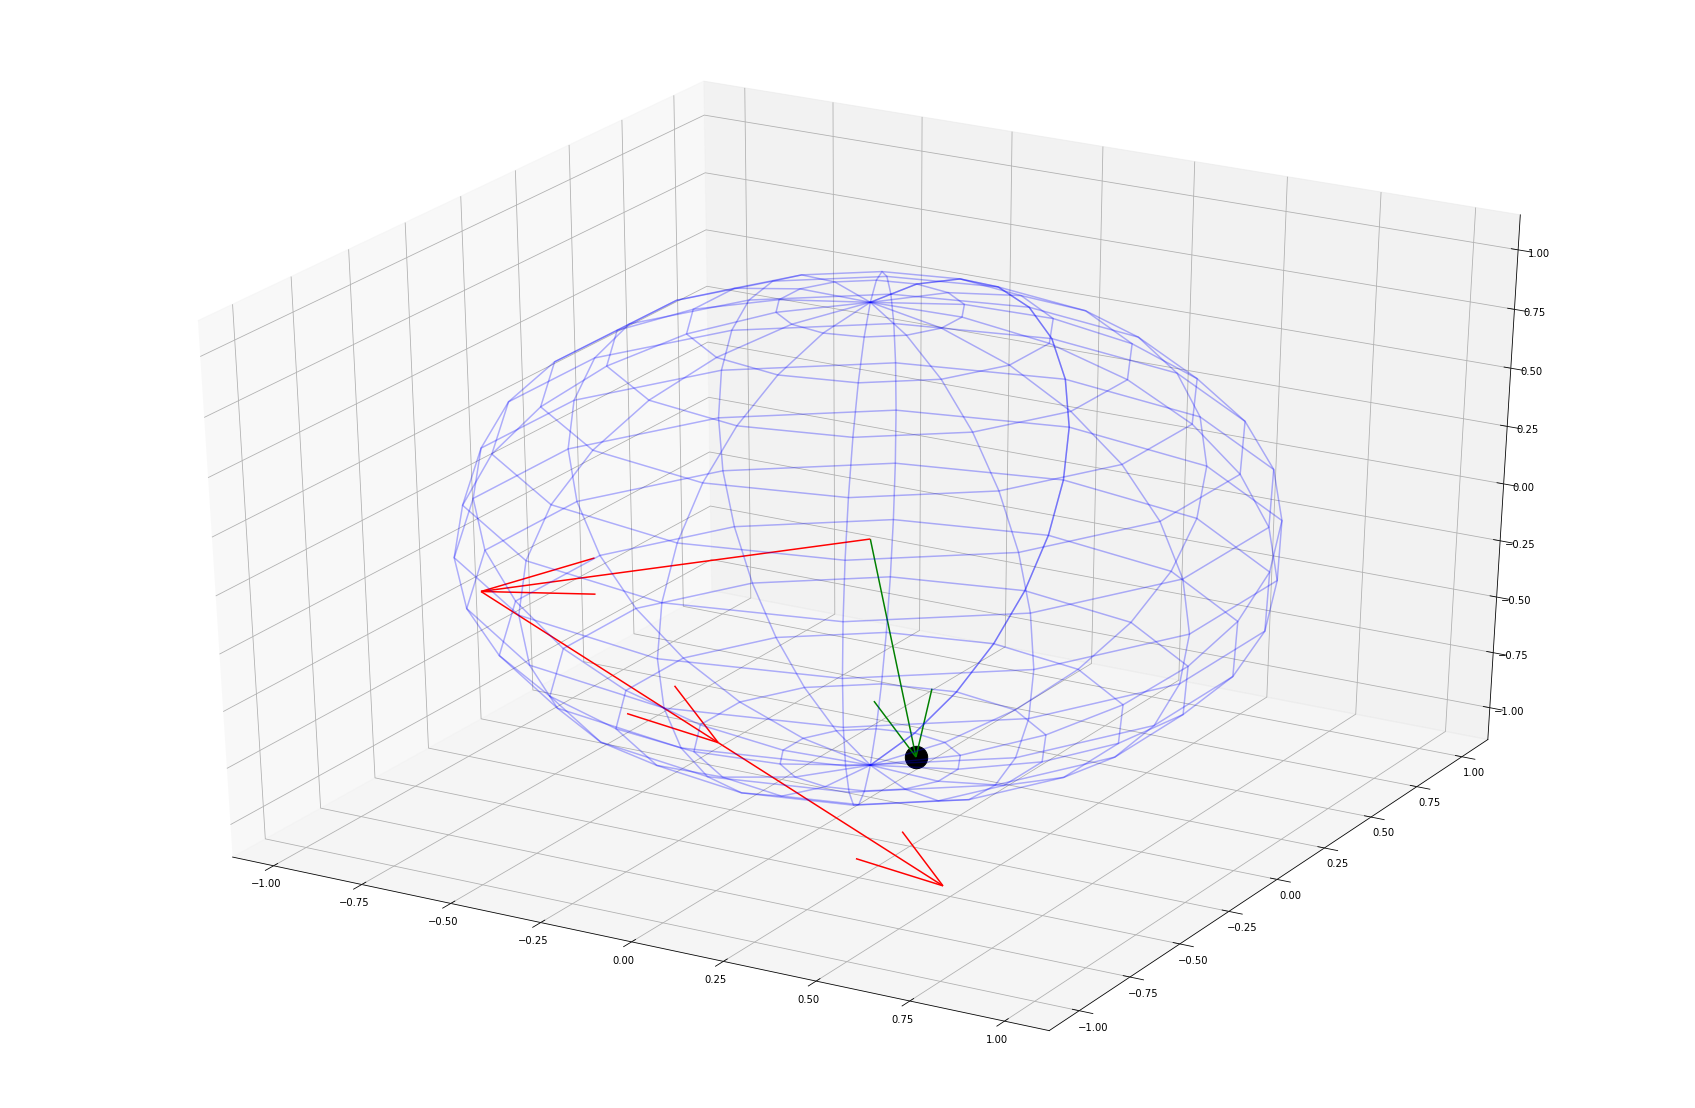

In [5]:
qbit_rotations = [[180,0],[180,180],[180,180]] 

fig = plt.figure(figsize=(30,20))
ax = plt.axes(projection='3d')

qvis = QVis(qbit_rotations)
qvis.draw(ax)

x,y,z = qvis.create_sphere()
ax.plot_wireframe(x, y, z, alpha = 0.3, color='blue')

## 5 entangled qbit

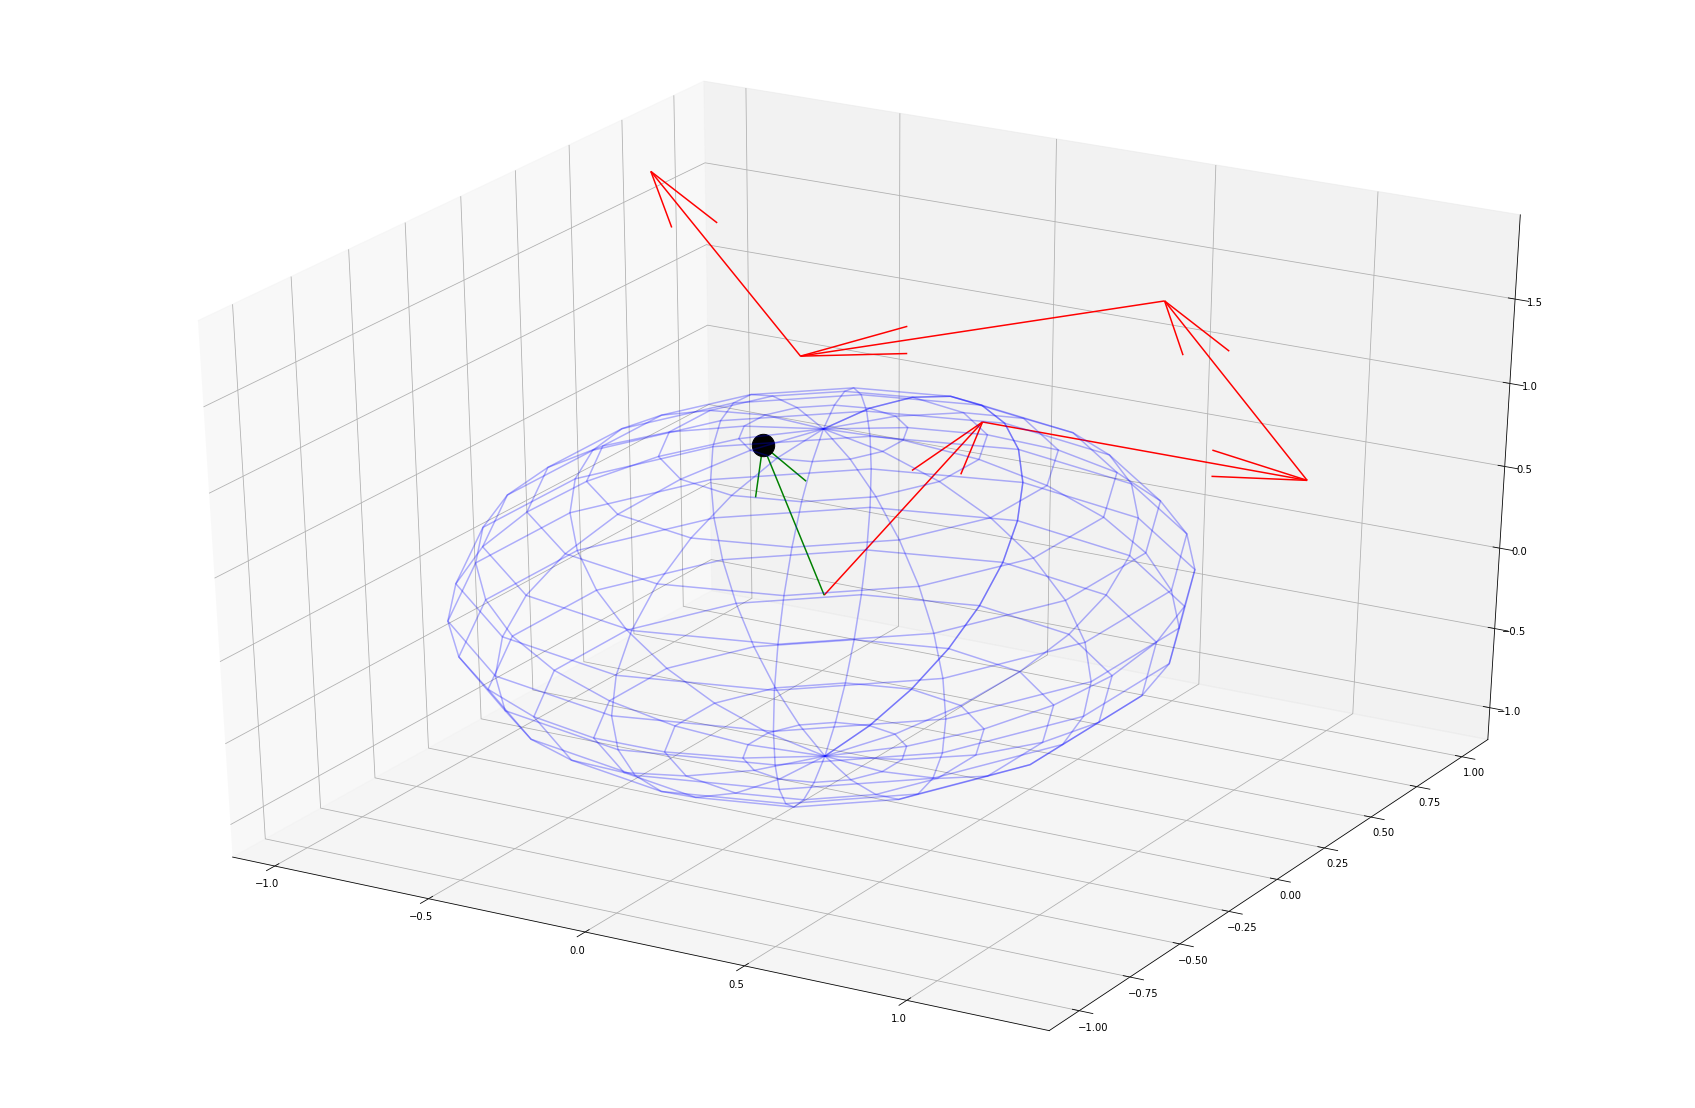

In [6]:
qbit_rotations = [[180,90],[0,0],[0,90],[180,0],[0,90]] 

fig = plt.figure(figsize=(30,20))
ax = plt.axes(projection='3d')

qvis = QVis(qbit_rotations)
qvis.draw(ax)

x,y,z = qvis.create_sphere()
ax.plot_wireframe(x, y, z, alpha = 0.3, color='blue')